### Import the libararies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

### Load the datasets

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


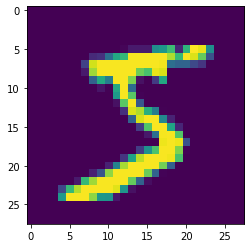

In [6]:
plt.imshow(X_train[0])
print(y_train[0])

0


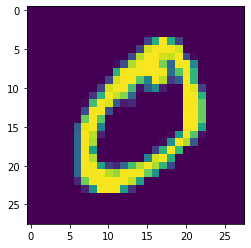

In [7]:
plt.imshow(X_train[1])
print(y_train[1])

4


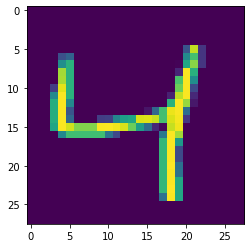

In [8]:
plt.imshow(X_train[2])
print(y_train[2])

1


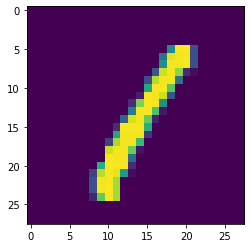

In [9]:
plt.imshow(X_train[3])
print(y_train[3])

7


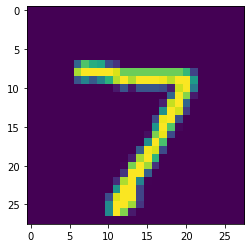

In [10]:
plt.imshow(X_test[0])
print(y_test[0])

2


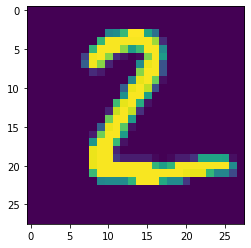

In [11]:
plt.imshow(X_test[1])
print(y_test[1])

### Preprocessing data

In [12]:
X_train = X_train/255
X_text = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model

In [14]:
model = Sequential()

In [15]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Train the model

In [18]:
history = model.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split=0.2)
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3315 - accuracy: 0.9085 - val_loss: 0.1798 - val_accuracy: 0.9488
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.1481 - accuracy: 0.9572 - val_loss: 0.1293 - val_accuracy: 0.9625
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9707 - val_loss: 0.1104 - val_accuracy: 0.9669
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9778 - val_loss: 0.0949 - val_accuracy: 0.9718
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9823 - val_loss: 0.0961 - val_accuracy: 0.9705
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9858 - val_loss: 0.0919 - val_accuracy: 0.9722
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0398 - accuracy: 0.9890 - val_loss: 0.0822 - val_accuracy: 0.9745

750/750 [==============================] - 1s 2ms/step - loss: 6.2314e-05 - accuracy: 1.0000 - val_loss: 0.1408 - val_accuracy: 0.9787
Epoch 58/100
750/750 [==============================] - 1s 2ms/step - loss: 4.9197e-05 - accuracy: 1.0000 - val_loss: 0.1413 - val_accuracy: 0.9783
Epoch 59/100
750/750 [==============================] - 1s 2ms/step - loss: 4.2087e-05 - accuracy: 1.0000 - val_loss: 0.1415 - val_accuracy: 0.9787
Epoch 60/100
750/750 [==============================] - 1s 2ms/step - loss: 3.5468e-05 - accuracy: 1.0000 - val_loss: 0.1417 - val_accuracy: 0.9785
Epoch 61/100
750/750 [==============================] - 1s 2ms/step - loss: 3.0735e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9795
Epoch 62/100
750/750 [==============================] - 1s 2ms/step - loss: 2.7445e-05 - accuracy: 1.0000 - val_loss: 0.1444 - val_accuracy: 0.9792
Epoch 63/100
750/750 [==============================] - 1s 2ms/step - loss: 2.3471e-05 - accuracy: 1.0000 - val_loss: 0.1447 

### Evaluate the model

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 36.1329 - accuracy: 0.9805


[36.13286209106445, 0.9804999828338623]

### Predict the model

In [20]:
model.predict(X_test)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

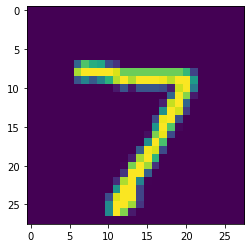

In [22]:
plt.imshow(X_test[0])

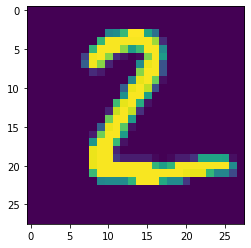

In [23]:
plt.imshow(X_test[1])

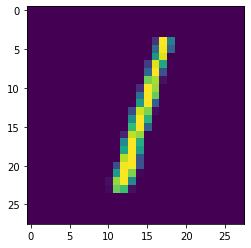

In [24]:
plt.imshow(X_test[2])

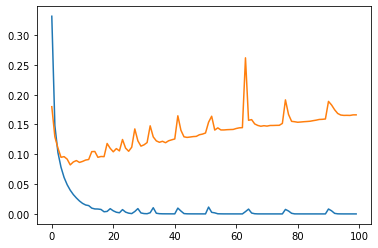

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

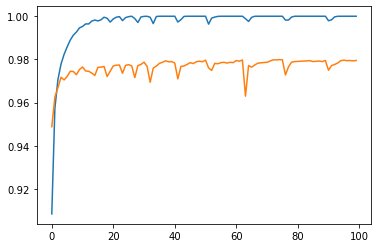

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Create GUI to predict digits

In [ ]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
model = load_model('mnist.h5')
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()